In [2]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('./sci3_15min_20171001_20171014.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,﻿時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,2017/10/01 00:00,北區,基礎大樓,主迴路,教學,91.0
1,2017/10/01 00:15,北區,基礎大樓,主迴路,教學,92.0
2,2017/10/01 00:30,北區,基礎大樓,主迴路,教學,91.0
3,2017/10/01 00:45,北區,基礎大樓,主迴路,教學,91.0
4,2017/10/01 01:00,北區,基礎大樓,主迴路,教學,90.0


In [5]:
newdf= df[['﻿時  間','用電量(單位:度)']]
print(newdf.describe()) 
print(newdf.shape) #How many data?

         用電量(單位:度)
count  1344.000000
mean    107.927827
std      19.391295
min      82.000000
25%      94.000000
50%     101.000000
75%     116.000000
max     186.000000
(1344, 2)


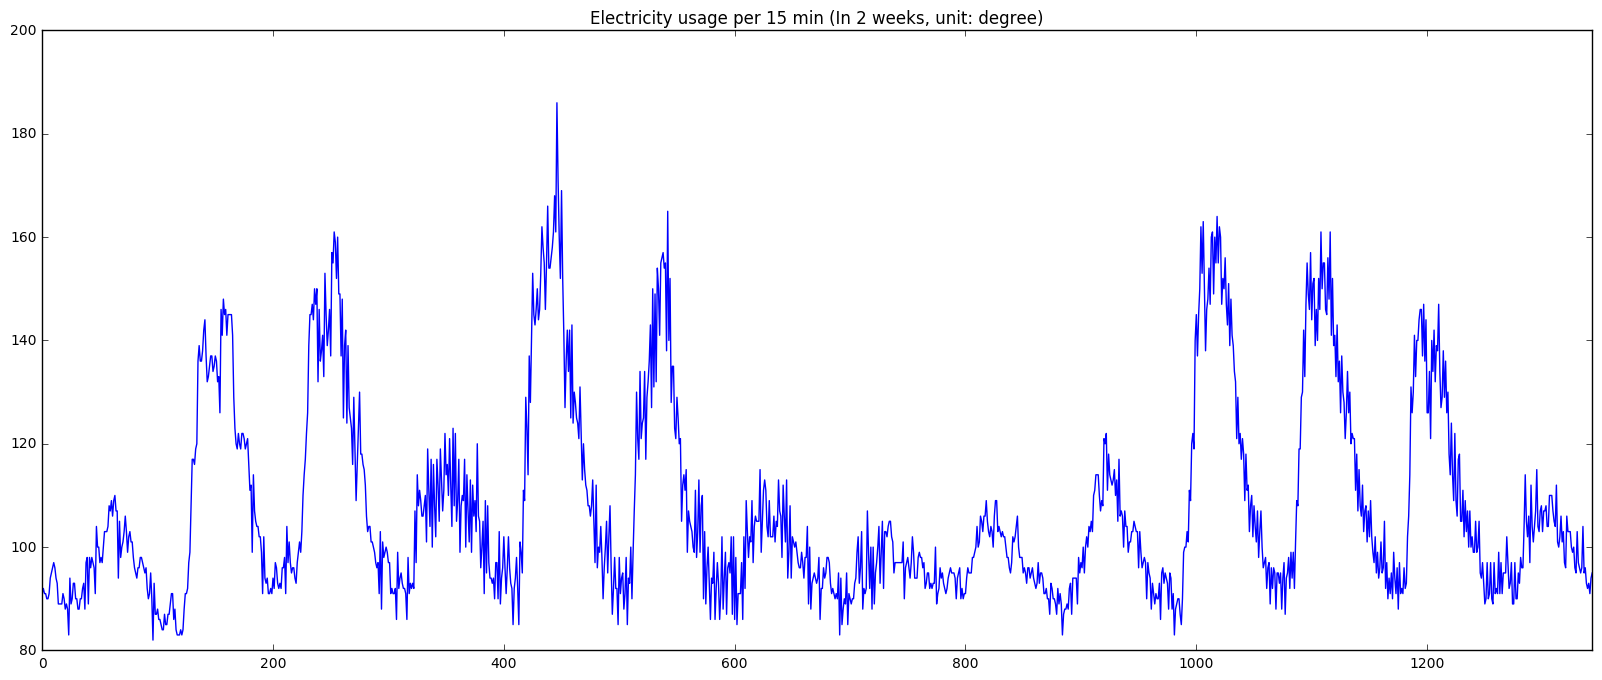

In [6]:
newdf['用電量(單位:度)'].plot.line()
matplotlib.pyplot.title('Electricity usage per 15 min (In 2 weeks, unit: degree)')

In [9]:
#把欄名改成英文
newdf = newdf.rename(index=str, columns={'﻿時  間':"Date_Time",'用電量(單位:度)':"Usage(In degree)"}) 
newdf.columns

Index(['Date_Time', 'Usage(In degree)'], dtype='object')

In [24]:
# df5.loc[:,'Hours'] = pd.Series(df5.Date_Time.str[10:16])
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
print (df_hr

0       00
1       15
2       30
3       45
4       00
5       15
6       30
7       45
8       00
9       15
10      30
11      45
12      00
13      15
14      30
15      45
16      00
17      15
18      30
19      45
20      00
21      15
22      30
23      45
24      00
25      15
26      30
27      45
28      00
29      15
        ..
1314    30
1315    45
1316    00
1317    15
1318    30
1319    45
1320    00
1321    15
1322    30
1323    45
1324    00
1325    15
1326    30
1327    45
1328    00
1329    15
1330    30
1331    45
1332    00
1333    15
1334    30
1335    45
1336    00
1337    15
1338    30
1339    45
1340    00
1341    15
1342    30
1343    45
Name: Date_Time, dtype: object

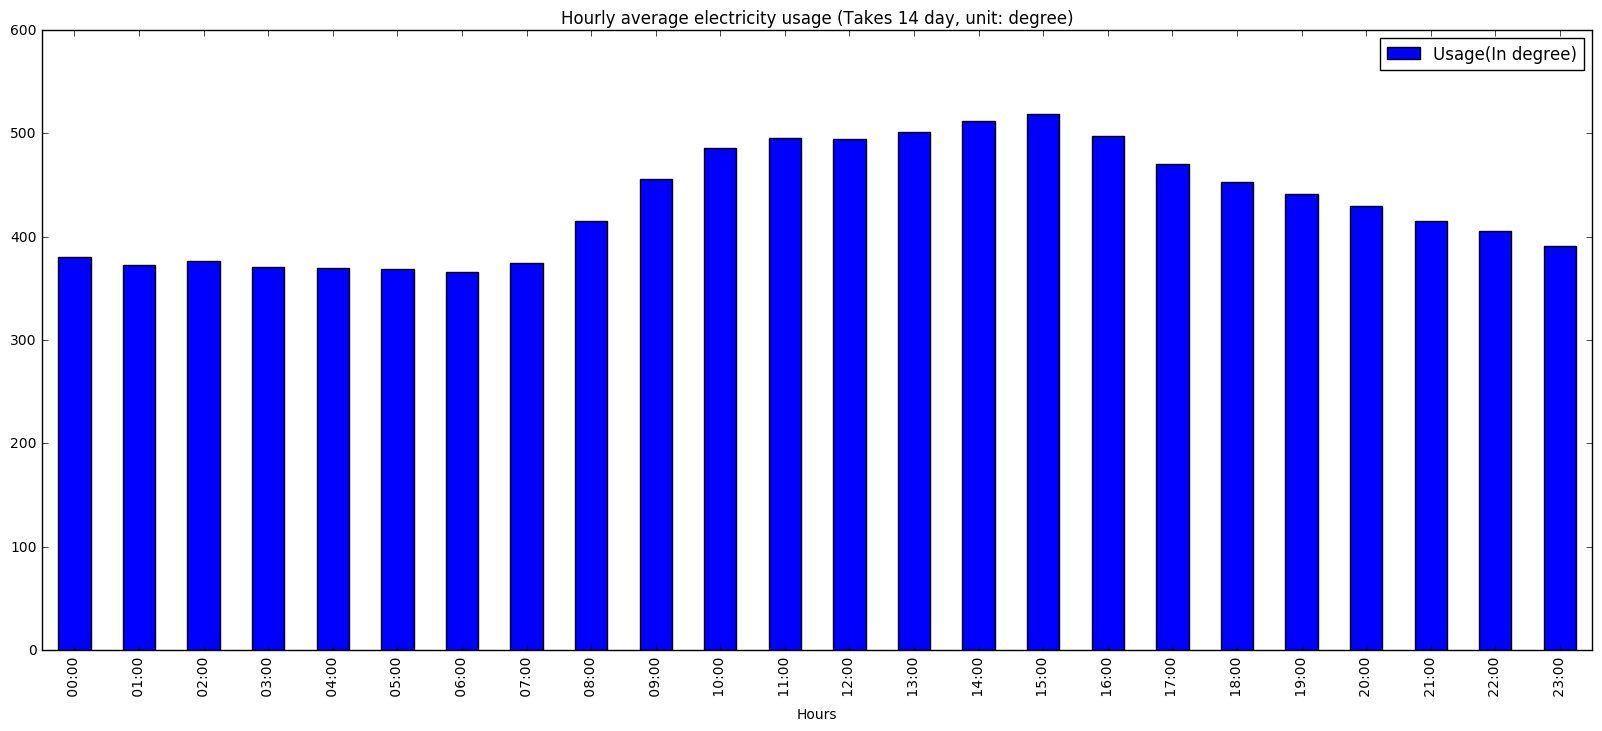

In [135]:
#科三每小時用電量
df_gpby = df_teh.groupby(['Hours'])
df_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

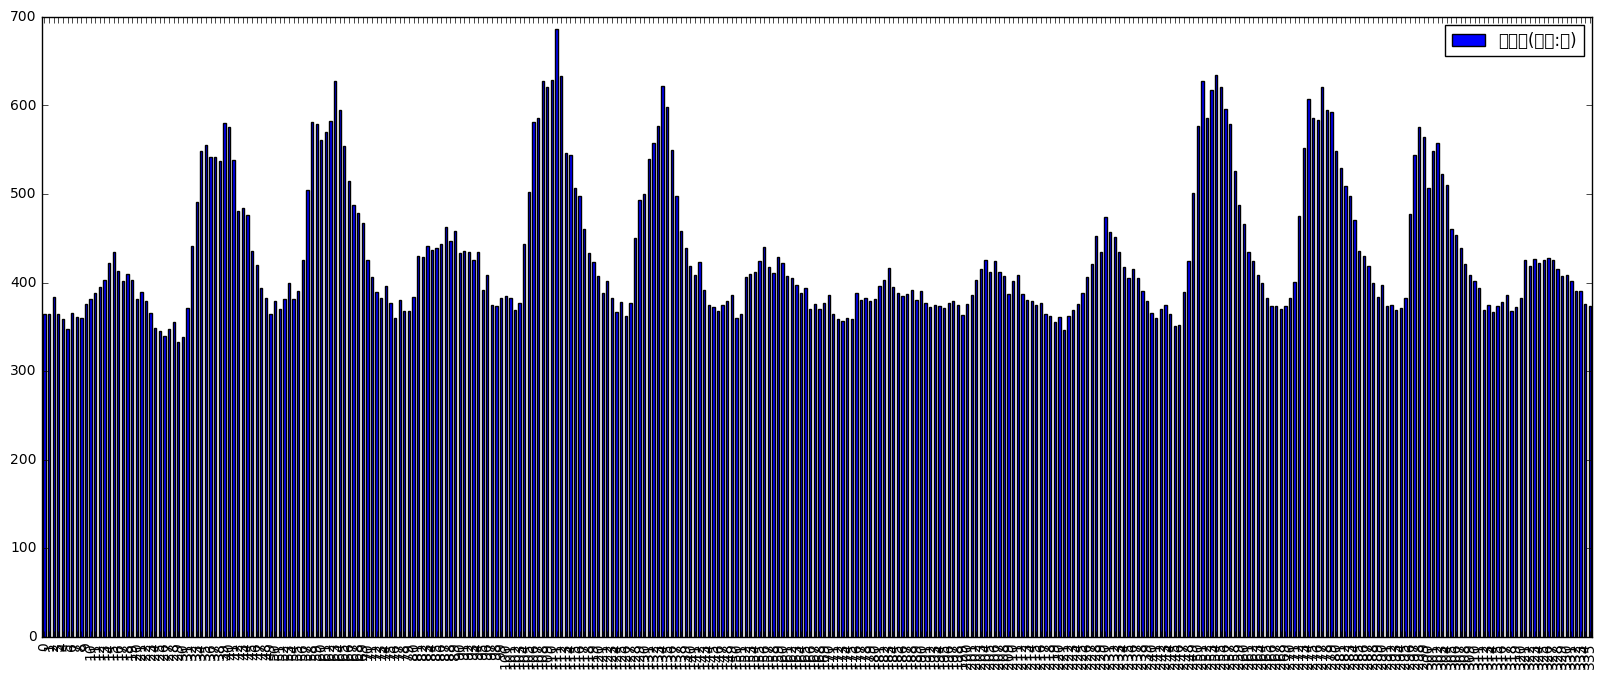

In [136]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')